.It is important that credit card companies are able to recognize 
fraudulent credit card transactions so that customers are
not charged for items that they did not purchase.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

# Import Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Import Dataset

In [2]:
#loading Dataset using pandas and stored actual file paths to variable
data1=pd.read_csv("creditcard.csv")

In [3]:
data1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploratory Data Analysis(EDA)

In [4]:
#Get the shape of the DataFrame
data1.shape

(284807, 31)

In [5]:
#print first 5 rows of the Dataframe
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#print last 5 rows of the Dataframe
data1.tail()
#all data is numeric and continous data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#get information about data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Use describe() to get descriptive statistics
data1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Check for null values in the DataFrame
data1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#check duplicated value
data1.duplicated().sum()

1081

In [11]:
#duplicate value is present
data1.duplicated().any()

True

In [12]:
#Remove Duplication
data1=data1.drop_duplicates()
data1.shape

(283726, 31)

In [13]:
data1.duplicated().any()

False

In [14]:
data1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
#value_count of class column
data1["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

## Data Visualization

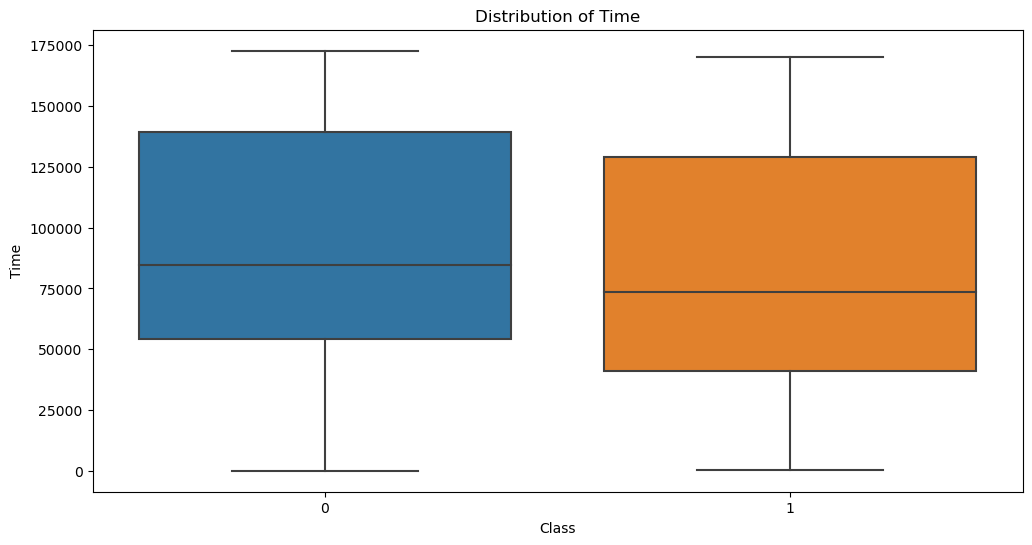

In [16]:
# Visualize the distribution of time for both classes
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(12, 6))
#xticks pecifies that there are two ticks on the x-axis
plt.xticks(range(2),LABELS)
sns.boxplot(x='Class', y='Time', data=data1)
plt.title("Distribution of Time")
plt.show()

"""It shows the distribution of time across two classes, labeled 0 and 1. 
Both classes have a median time around 100,000, with similar interquartile ranges, and there are no visible outliers. 
This type of graph is useful for comparing the central tendency and variability of two datasets."""

Text(0, 0.5, 'No Of Occurences')

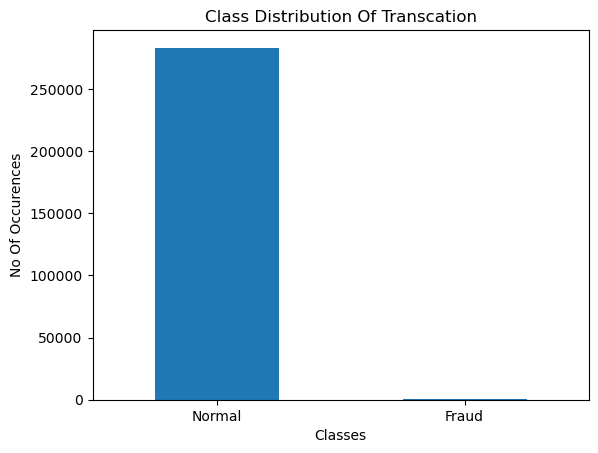

In [17]:
#Visualize the distribution of the target variable 'Class'
#counts the occurrences of each unique value in the "Class" column 
set_class=pd.value_counts(data1["Class"],sort=True)

#define the labels for classes.
LABELS = ['Normal', 'Fraud']

#creates a bar plot of the class distribution 
set_class.plot(kind='bar',rot=0)

#Sets the title of the plot.
plt.title("Class Distribution Of Transcation")

#xticks pecifies that there are two ticks on the x-axis
plt.xticks(range(2),LABELS)

#: Sets the label for the x-axis.
plt.xlabel("Classes")

#Sets the label for the y-axis.
plt.ylabel("No Of Occurences")

In [18]:
#the Above code is creating a bar plot to visualize the class distribution of transactions, where the x-axis represents the classes ("Normal" and "Fraud") and the 
#y-axis represents the number of occurrences of each class in the dataset.

In [19]:
#It selects only those rows where the value in the "Class" column is equal to 1."""
fraud_data=data1[data1['Class']==1]

#It selects only those rows where the value in the "Class" column is equal to 0
normal_data=data1[data1["Class"]==0]

after executing these lines of code, we end up with two separate DataFrames: 
fraud_data containing only rows where the "Class" is 1 (fraudulent transactions), 
and normal_data containing only rows where the "Class" is 0 (normal transactions)

In [20]:
print("Fraud Data:",fraud_data.shape)
print("Normal Data:",normal_data.shape)

Fraud Data: (473, 31)
Normal Data: (283253, 31)


In [21]:
# Count the number of instances in each class
class_counts = data1['Class'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

print(f"Class Imbalance Ratio: {imbalance_ratio:.4f}")

Class Imbalance Ratio: 0.0017


In [22]:
#This method provides a summary of descriptive statistics for the Amount column of the fraud_data
fraud_data.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
#normal_data.Amount.describe method on the "Amount" column of the normal_data DataFrame."""
normal_data.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

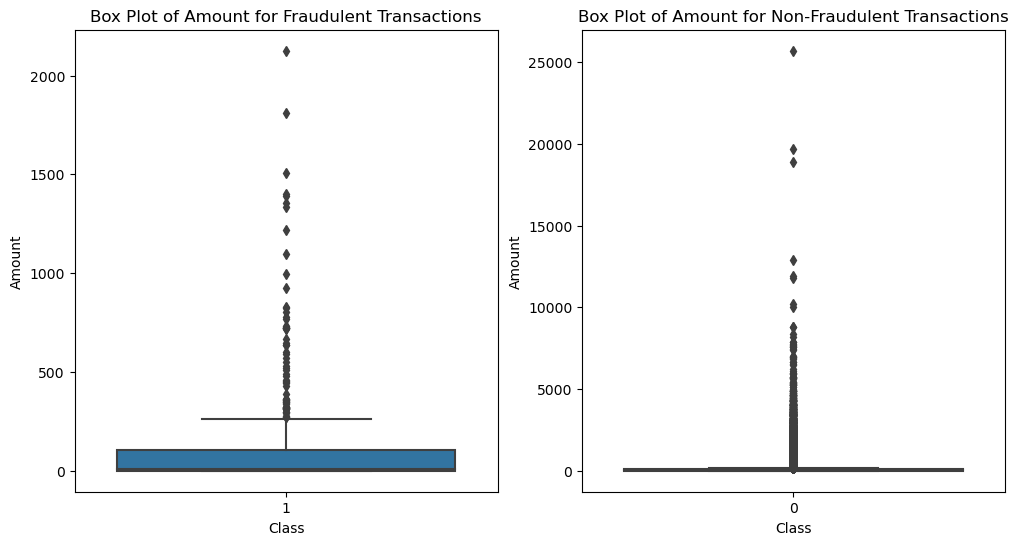

In [24]:
# Create box plots for the 'Amount' column(differentiate it with fraudulent and non-fraudulent transcations)
plt.figure(figsize=(12, 6))

# Box plot for fraudulent transactions
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=fraud_data)
plt.title('Box Plot of Amount for Fraudulent Transactions')

# Box plot for non-fraudulent transactions
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=normal_data)
plt.title('Box Plot of Amount for Non-Fraudulent Transactions')

#plt.tight_layout()
plt.show()

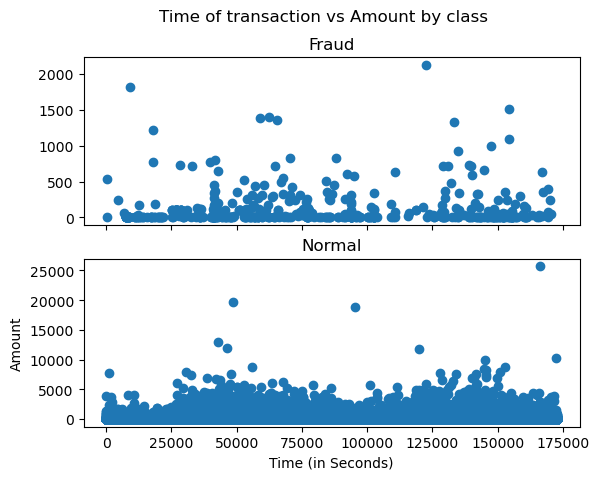

In [26]:
# We Will check Do fraudulent transactions occur more often during certain time frame.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_data.Time,fraud_data.Amount )
ax1.set_title('Fraud')
ax2.scatter(normal_data.Time, normal_data.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Correlation with Class:
Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


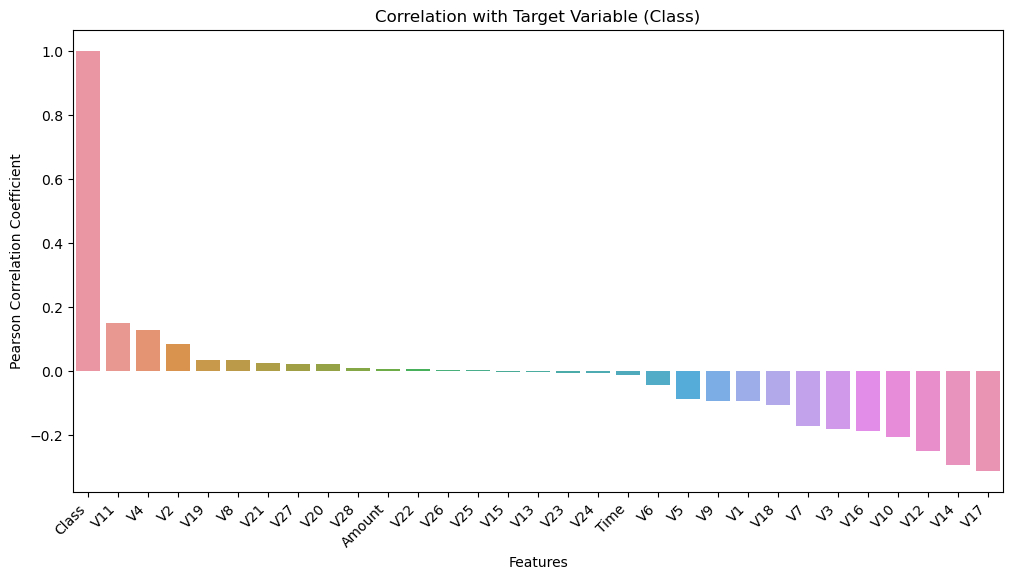

In [27]:
# Calculate Pearson correlation coefficients
correlation_matrix = data1.corr()
correlation_with_class = correlation_matrix['Class'].sort_values(ascending=False)

# Print the correlation values
print("Correlation with Class:")
print(correlation_with_class)

# Visualize the correlation values
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values)
plt.title('Correlation with Target Variable (Class)')
plt.xlabel('Features')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

## Handling Imbalanced Data
resampling is commonly used to address this issue
it consists of removing samples from the majority class(under-sampling)or adding more examples from the monority class (over-sampling)
### we use synthetic Minority Oversampling Technique(SMOTE)


In [51]:
!pip install imblearn

In [53]:
!pip install imbalanced-learn==0.8.0


In [54]:
from imblearn.over_sampling import SMOTE

In [10]:
#from imblearn.utils.validation import check_X_y
!pip show imbalanced-learn
!pip install --upgrade imbalanced-learn


Name: imbalanced-learn
Version: 0.12.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\Arati\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn


In [41]:
#x represents the features (independent variables) 
x=data1.drop("Class",axis=1)
#y represents the features (dependent variables) 
y=data1["Class"]

In [42]:
x.shape

(283726, 30)

In [43]:
y.shape

(283726,)

In [44]:
#you can specify a random state for reproducibility
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(x,y)

In [45]:
x_smote.shape

(566506, 30)

In [46]:
y_smote.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [49]:
from collections import Counter
print("original dataset shape",Counter(y))
print("resample dataset shape",Counter(y_smote))

original dataset shape Counter({0: 283253, 1: 473})
resample dataset shape Counter({0: 283253, 1: 283253})


## Correlation Matrix in Imbalanced Data

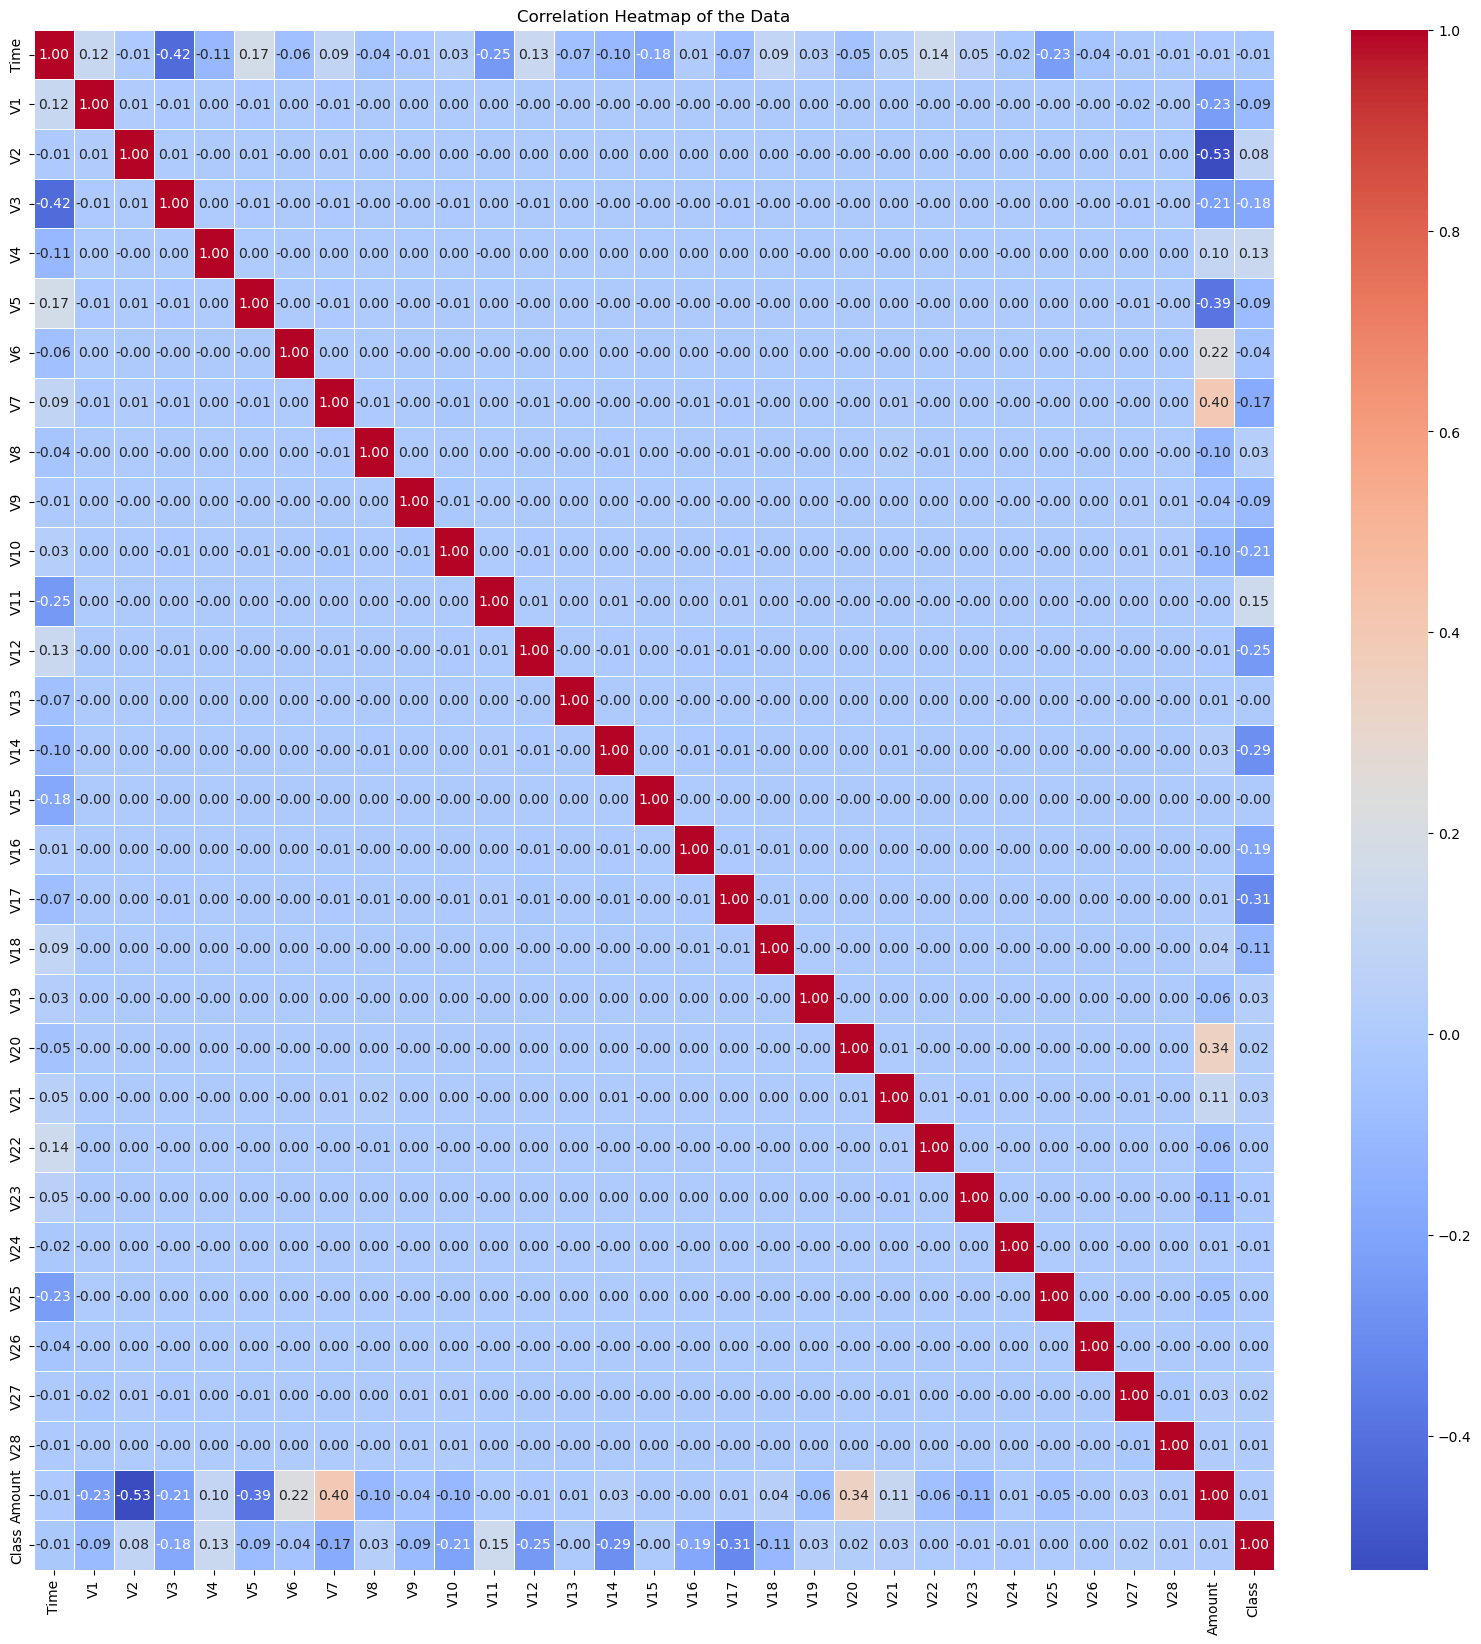

In [70]:
#correlation
#get correlation of each feactures in dataset
correlation_data=data1.corr()
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of the Data')
plt.show()

In [59]:
corr_imbalanced=data1.corr()
corr_imbalanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


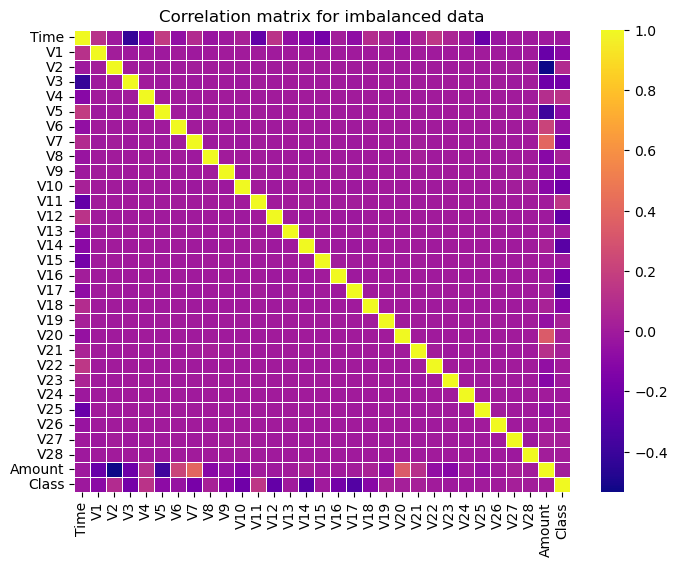

In [62]:
corr_imbalanced=data1.corr()
plt.figure(figsize=(8,6))
#plot heat map
sns.heatmap(corr_imbalanced, annot=False, cmap='plasma', linewidths=0.5)
plt.title('Correlation matrix for imbalanced data')
plt.show()

## Correlation Matrix in Imbalanced Data

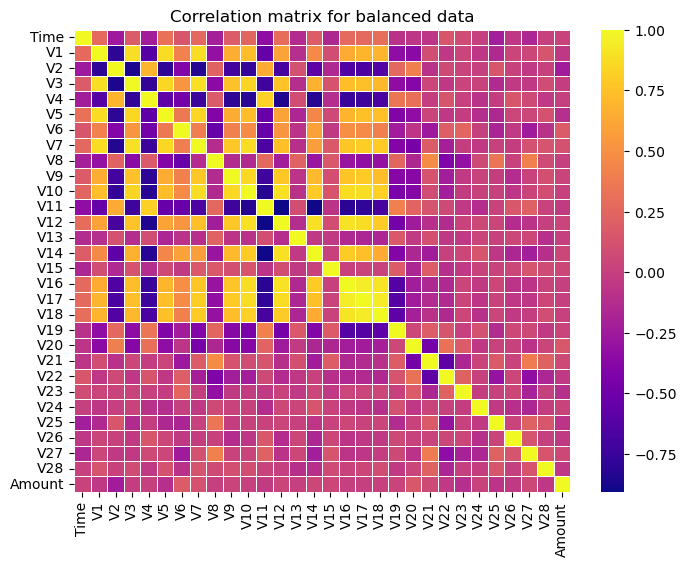

In [63]:
corr_balanced=x_smote.corr()
plt.figure(figsize=(8,6))
#plot heat map
sns.heatmap(corr_balanced, annot=False, cmap='plasma', linewidths=0.5)
plt.title('Correlation matrix for balanced data')
plt.show()

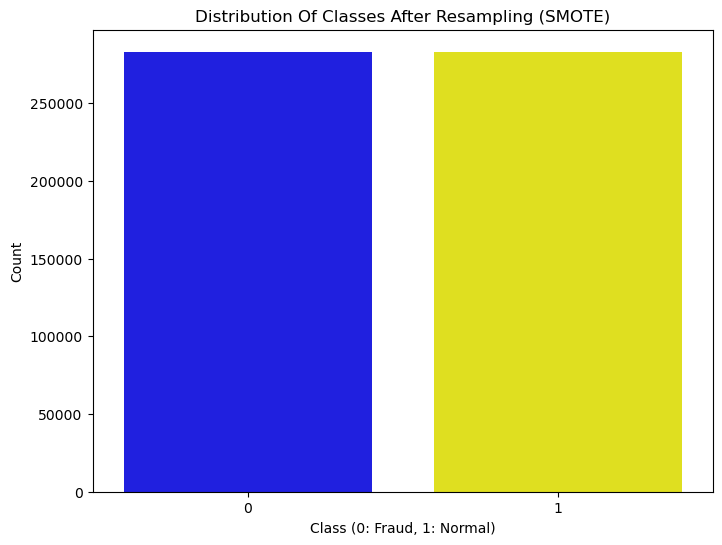

In [69]:
#creating a count plot to visualize the distribution of classes after performing resampling using SMOTE (Synthetic Minority Over-sampling Technique). 
custom_palette = sns.color_palette(["blue", "yellow"])
plt.figure(figsize=(8, 6))  # Fixed the typo in 'figsize'
sns.countplot(x=y_smote, palette=custom_palette)
plt.title("Distribution Of Classes After Resampling (SMOTE)")
plt.xlabel("Class (0: Fraud, 1: Normal)")  # Added spaces for better readability
plt.ylabel("Count")
plt.show()


## Data Splitting

In [71]:
#x represents the features (independent variables) 
x=data1.drop("Class",axis=1)
#y represents the features (dependent variables) 
y=data1["Class"]

In [72]:
print("input Range of x:",x.shape)
print("input Range of y:",y.shape)

input Range of x: (283726, 30)
input Range of y: (283726,)


In [73]:
print("Class Labels:\n",y)

Class Labels:
 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64


## train and test data split

In [100]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_smote,y_smote,test_size=0.20,random_state=42)


In [95]:
print("xtrain shape:",xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:",ytrain.shape)
print("ytest shape:", ytest.shape)

xtrain shape: (212794, 30)
xtest shape: (70932, 30)
ytrain shape: (212794,)
ytest shape: (70932,)


# Model Bulding

## 1.Logistic Regression:
Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical and has two classes. It's a type of regression analysis suitable for predicting the probability of an event occurring based on one or more predictor variables. 

In [101]:
# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(xtrain, ytrain)


C:\Users\Arati\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [102]:
# Make predictions on the test set
y_pred = model.predict(xtest)


## Classiification Performance Metrics

#classification Report:

In [103]:
# Assuming ytest is the true labels and y_pred is the predicted labels
classification_report_logistic = classification_report(ytest, y_pred)

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_report_logistic)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56463
           1       0.98      0.96      0.97     56839

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



## Precision:
Precision for class 0 (non-fraud): 0.96 (96%)
Precision for class 1 (fraud): 0.98 (98%)
This indicates that, among the instances predicted as non-fraudulent (class 0), 96% were truly non-fraudulent. Similarly, among the instances predicted as fraudulent (class 1), 98% were truly fraudulent.

## Recall (Sensitivity):
Recall for class 0 (non-fraud): 0.98 (98%)
Recall for class 1 (fraud): 0.96 (96%)
This means that the model correctly identified 98% of the actual non-fraudulent transactions and 96% of the actual fraudulent transactions.

## F1-score:
F1-score for class 0 (non-fraud): 0.97 (97%)
F1-score for class 1 (fraud): 0.97 (97%)
The F1-score is the harmonic mean of precision and recall. It provides a balanced measure, and in this case, it's 97% for both classes.

## Support:
Support for class 0 (non-fraud): 56,463
Support for class 1 (fraud): 56,839
These are the actual occurrences of each class in the dataset.

## Accuracy:

Overall accuracy of the model: 0.97 (97%)
The accuracy indicates the proportion of correctly classified instances among the total instances in the dataset.

##In summary, the logistic regression model exhibits high precision, recall, and F1-score for both non-fraudulent and fraudulent classes. The balanced performance suggests that the model is effective in distinguishing between the two classes in  credit card fraud detection task.

## model Prediction
Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

## Decision Tree 

In [105]:
dt_classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [106]:
y_pred_decision_tree=dt_classifier.predict(xtest)

In [107]:
print("y_pred_decision_tree \n",y_pred_decision_tree)

y_pred_decision_tree 
 [1 0 0 ... 1 0 0]


In [108]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,precision_score,f1_score
# Evaluate the model
accuracy = accuracy_score(ytest, y_pred_decision_tree)
precision = precision_score(ytest, y_pred_decision_tree)
recall = recall_score(ytest, y_pred_decision_tree)
f1 = f1_score(ytest, y_pred_decision_tree)
conf_matrix = confusion_matrix(ytest, y_pred_decision_tree)

# Print the evaluation metrics
print("Test Set Evaluation Metrics for Decision Tree:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Test Set Evaluation Metrics for Decision Tree:

Accuracy: 0.9987378863568163
Precision: 0.9981723604667511
Recall: 0.9993138514048453
F1 Score: 0.9987427797754587
Confusion Matrix:
 [[56359   104]
 [   39 56800]]


## Decision Tree Model:
### Accuracy: 99.87%
Percentage of correctly predicted instances out of the total instances.

### Precision: 99.82%
Out of the instances predicted as positive, the percentage that is truly positive.

### Recall: 99.93%
Out of all the actual positive instances, the percentage that was correctly predicted.

### F1 Score: 99.87%
The harmonic mean of precision and recall, providing a balance between the two.

### Confusion Matrix:
[[56359   104]
 [   39 56800]]
True Negative (TN): 56359
False Positive (FP): 104
False Negative (FN): 39
True Positive (TP): 56800